In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

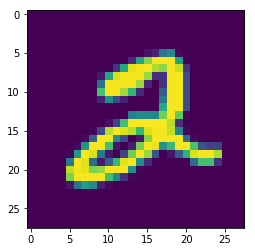

In [4]:
plt.imshow(X_train[5])
plt.show()

### Preprocessing
* reshaping input according to keras requirement for tensorflow background.
    * for 2d-convnet in keras input = [numInstances, height, width, 1] ---- i.e 1 for grayscale images
* normalizing input between [0,1]
* one-hot encoding for the target variables


In [5]:
from keras.utils.np_utils import to_categorical

In [6]:
lenTrain,height,width = X_train.shape
lenTest,height,width = X_test.shape
X_train = X_train.reshape(lenTrain,height,width,1).astype("float32")
X_test = X_test.reshape(lenTest,height,width,1).astype("float32")

In [7]:
X_train /= 255
X_test /=255


In [8]:
numClasses = 10
y_train = to_categorical(y_train,numClasses)

In [9]:
y_test = to_categorical(y_test,numClasses)

In [10]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout 

In [11]:
imageModel = Sequential()

In [12]:
inputShape = (height,width,1)
imageModel.add(Convolution2D(16,5,5,border_mode="same",input_shape = inputShape))
imageModel.add(MaxPooling2D(pool_size=(2,2),border_mode="same"))
imageModel.add(Activation(activation="relu"))
imageModel.add(Convolution2D(36,5,5,border_mode="same"))
imageModel.add(MaxPooling2D(pool_size=(2,2),border_mode="same"))
imageModel.add(Activation(activation="relu"))
imageModel.add(Flatten())
imageModel.add(Dense(128))
imageModel.add(Dense(numClasses))
imageModel.add(Activation(activation="softmax"))

In [13]:
imageModel.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
import sys
sys.stdout = open('keras_output.txt', 'w')
history = imageModel.fit(X_train, y_train, batch_size=128, nb_epoch=5, verbose=1,validation_split=0.33)
sys.stdout = sys.__stdout__

In [15]:
imageModel.evaluate(X_test,y_test,verbose=0)

[0.03110207096124068, 0.98970000000000002]

In [18]:
sys.stdout?

In [16]:
history.history

{'acc': [0.9266150899276101,
  0.9803726460857235,
  0.98592004776238218,
  0.98975098883056789,
  0.99077091469937062],
 'loss': [0.24081663631362232,
  0.063927379052599237,
  0.045426955352446959,
  0.033144350724322633,
  0.028198276389645668],
 'val_acc': [0.97141558510758319,
  0.97954648729526816,
  0.98318266728617776,
  0.98267764228744026,
  0.98565728977999112],
 'val_loss': [0.091331478228810326,
  0.067487958914811824,
  0.05564510705877293,
  0.05442604246812182,
  0.048178661922165515]}